### 시계열 데이터
- 시간의 흐름에 따른 데이터
- 시퀀스 데이터로 예측 가능
- 완벽한 예측은 불가능
- 다변량(multivariate) 데이터 적용 가능
- 구성 변경이 어렵고 유연하지 않음
- 데이터가 정상성을 띌 때, 시계열 예측의 정확도가 높아짐
- 정상성이 없으면 예측의 의미가 감소함
- 아리마(ARIMA) 모델 관련 설명 필요

### 다변량과 단변량

Multivariate (다변량) vs Multivariable (다변수) <br>
여러 종속변수 vs 여러 독립 변수 <br>

Multivariate : 인풋에 대한 여러 아웃풋 <br>
Multivariable : 여러 인풋 <br>

### 시간 종속성 Time Dependence
- 과거의 데이터로 미래의 데이터 예측
- 불규칙성이 있으면 예측이 어렵다.

### 시계열 특성
- **계절성** : 계절적 요인
- **추세** : 장기적인 경향
- **주기성** : 고정된 기간이 아닌 불규칙한 간격으로 발생
- **정상성** : 평균, 공분산, 분산 등의 시간에 따라 일정하게 유지 - 대부분 이 가정을 시계열을 한다.

### **정상성**
- 시각적 판단
    - 지속적인 상승 또는 하락 추세가 없다.
    - 과거의 변동폭과 현재의 변동폭이 같다.
    - 평균과 분산, 공분산 등이 시간과 무관하게 일정 = 계절성이 없다.

- 통계적 판단
    - 평균이 일정
    - 분산이 시점에 독립적
    - 공분산이 시차에 의존적이나 시점에 독립적

- 비 정상성이 있는데이터는 정상성을 가지도록 변환하고 분석해야한다.

시계열 -> 정상성 검증 -> 정상성을 띄도록 -> 정확도 향상

[*********************100%***********************]  1 of 1 completed

<Axes: xlabel='Date'>

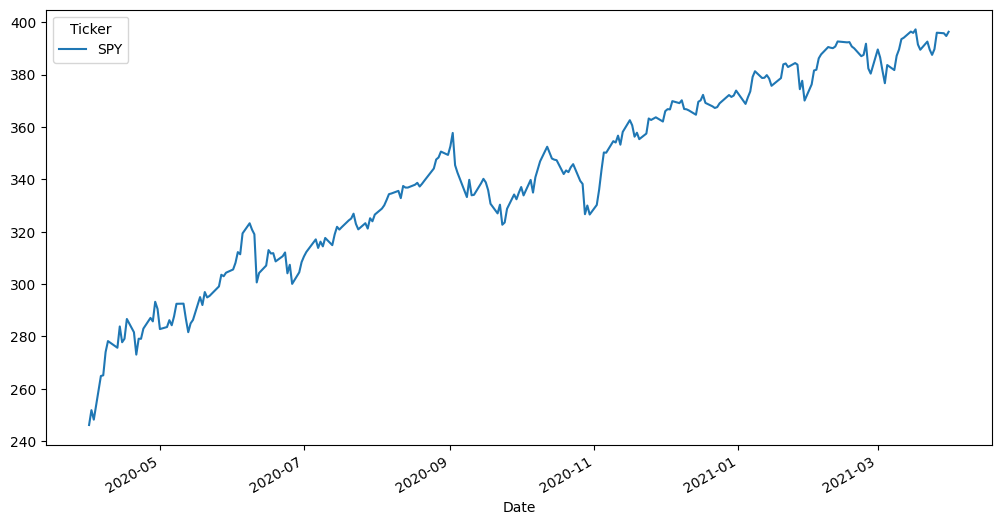

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#spy
spy = yf.download('spy', start='2020-04-01', end='2021-04-01')
spy

#테슬라 주식 종가
df_spy = pd.DataFrame(spy['Close'])

#시각화
df_spy.plot(figsize=(12.2, 6.4))

In [7]:
from statsmodels.tsa.stattools import adfuller

print('ADF test with spy time-series')
ADF_result = adfuller(df_spy.values)
#ADF 통계량
print('ADF Stats: %f' % ADF_result[0])
#p-값
print('p-value: %f' % ADF_result[1])
#임계값
print('Critical values:' )
for key, value in ADF_result[4].items():
 print('\t%s: %.4f' % (key, value))


ADF test with spy time-series
ADF Stats: -1.385978
p-value: 0.588980
Critical values:
	1%: -3.4573
	5%: -2.8734
	10%: -2.5731


In [8]:
ar = spy[["Close"]].copy()
ar["lag_1"] = ar.shift(-1)

In [9]:
ar

Price,Close,lag_1
Ticker,SPY,
Date,,
2020-04-01 00:00:00+00:00,246.149994,251.830002
2020-04-02 00:00:00+00:00,251.830002,248.190002
2020-04-03 00:00:00+00:00,248.190002,264.859985
2020-04-06 00:00:00+00:00,264.859985,265.130005
2020-04-07 00:00:00+00:00,265.130005,274.029999
...,...,...
2021-03-25 00:00:00+00:00,389.700012,395.980011
2021-03-26 00:00:00+00:00,395.980011,395.779999
